## M3: Time Series Decomposition Assignment 

By Kent Livesay 

Due 3.27.22 

In [140]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np 
import scipy
from scipy import stats
df_cts = pd.read_csv('ConstructionTimeSeriesDatav2.csv')
month = df_cts['Month']
month = month[:-2]
monthYear = df_cts['Month-Year']
monthYear = monthYear[:-2]
totCons = df_cts['Total Construction']
totCons = totCons[:-2]
privCons = df_cts['Private Construction']
privCons = privCons[:-2]
pubCons = df_cts['Public Construction']
pubCons = pubCons [:-2]
df_cts

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375
...,...,...,...,...,...
141,142,Oct-13,85193,59370,25823
142,143,Nov-13,77931,55191,22741
143,144,Dec-13,71502,52132,19369
144,145,Jan-14,64661,47827,16834


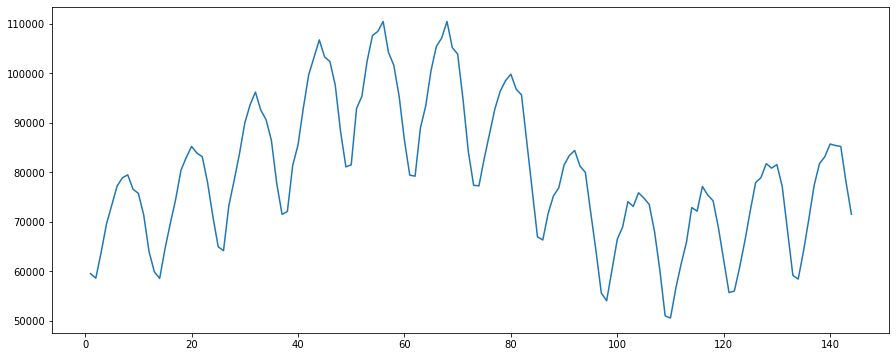

In [141]:
fig,ax = plt.subplots()
ax.plot(month,totCons)
fig.set_size_inches(15,6)

In [142]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_cts.index,df_cts['Total Construction'])
print('slope=', slope,'   intercept=',intercept  ,'   p_value=', p_value)

slope= -80.58931294766369    intercept= 85313.39642158234    p_value= 0.0037274458499943386


In [143]:
def create_regress_col(row, intercept,slope):
    return float(intercept) + float(row['Month'])*slope
df_cts['regress']=df_cts.apply(create_regress_col,args = (intercept,slope),axis = 'columns')
df_cts['R1'] = df_cts['Total Construction'] - df_cts['regress']


In [144]:
df_cts

,Month,Month-Year,Total Construction,Private Construction,Public Construction,regress,R1
0,1,Jan-02,59516,45273,14243,85232.807109,-25716.807109
1,2,Feb-02,58588,44475,14113,85152.217796,-26564.217796
2,3,Mar-02,63782,49396,14386,85071.628483,-21289.628483
3,4,Apr-02,69504,53283,16221,84991.039170,-15487.039170
4,5,May-02,73384,55009,18375,84910.449857,-11526.449857
...,...,...,...,...,...,...,...
141,142,Oct-13,85193,59370,25823,73869.713983,11323.286017
142,143,Nov-13,77931,55191,22741,73789.124670,4141.875330
143,144,Dec-13,71502,52132,19369,73708.535357,-2206.535357
144,145,Jan-14,64661,47827,16834,73627.946044,-8966.946044


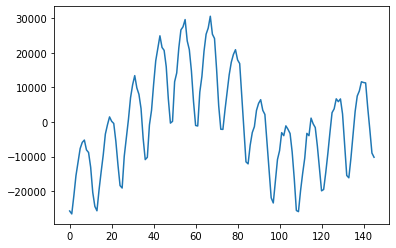

In [145]:
plt.plot(df_cts.index,df_cts.R1)



In [146]:
lag = 12
df_cts['lag12'] = np.NaN
for i in range(len(df_cts['lag12']))[lag:]:
    df_cts['lag12'].iloc[i] = df_cts['Total Construction'].iloc[i-12]
print(df_cts.head(n=20))

for i in range(int(len(df_cts.index)/2)):
    print('autocorrelation, lag =',i,':',df_cts.R1.autocorr(lag=i))

    Month Month-Year  Total Construction  Private Construction  \
0       1     Jan-02               59516                 45273   
1       2     Feb-02               58588                 44475   
2       3     Mar-02               63782                 49396   
3       4     Apr-02               69504                 53283   
4       5     May-02               73384                 55009   
5       6     Jun-02               77182                 57801   
6       7     Jul-02               78863                 58494   
7       8     Aug-02               79460                 57953   
8       9     Sep-02               76542                 55157   
9      10     Oct-02               75710                 56023   
10     11     Nov-02               71362                 53552   
11     12     Dec-02               63984                 48023   
12     13     Jan-03               59877                 45473   
13     14     Feb-03               58526                 44620   
14     15 

C:\Users\jkent\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


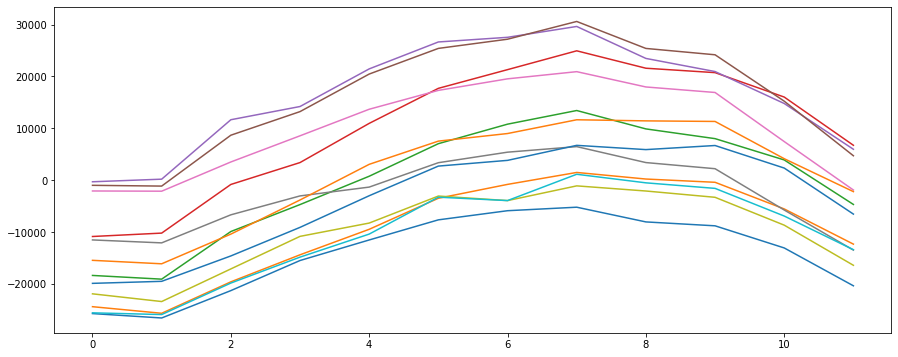

In [147]:
dfmonth = pd.DataFrame()
cyclelen = 12
for i in range(int(len(df_cts.index)/cyclelen)):
    newdata = pd.DataFrame({i:df_cts['R1'].iloc[i*cyclelen:(i+1)*cyclelen]})
    newdata.index = range(0,len(newdata))
    dfmonth = pd.concat([dfmonth,newdata],axis=1)
    
fig,ax = plt.subplots()
ax.plot(dfmonth)
fig.set_size_inches(15,6)

               0             1             2             3             4  \
0  -25716.807109 -24388.735353 -18364.663598 -10857.591843   -306.520087   
1  -26564.217796 -25659.146040 -19080.074285 -10203.002530    194.069226   
2  -21289.628483 -19598.556727  -9899.484972   -825.413217  11651.658539   
3  -15487.039170 -14385.967414  -4702.895659   3395.176096  14201.247852   
4  -11526.449857  -9470.378101    759.693654  10949.765409  21452.837165   
5   -7647.860544  -3485.788789   7036.282967  17703.354722  26645.426478   
6   -5886.271231   -811.199476  10798.872280  21309.944035  27542.015791   
7   -5208.681918   1489.389837  13429.461593  24938.533348  29633.605103   
8   -8046.092605    219.979150   9884.050906  21582.122661  23471.194416   
9   -8797.503292   -407.431537   8008.640219  20732.711974  20942.783729   
10 -13064.913979  -5544.842224   3901.229532  16023.301287  14780.373042   
11 -20362.324666 -12329.252911  -4679.181155   6726.890600   5957.962355   

           

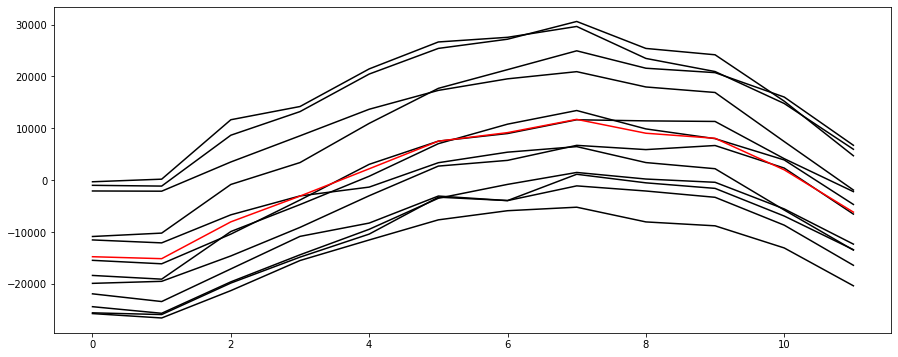

In [148]:
avg = [] 
for i in range(len(dfmonth.index)):
    avg.append(dfmonth.iloc[i].mean())
    
dfmonth = pd.concat([dfmonth, pd.DataFrame({'avg':avg})], axis=1)
print(dfmonth)

fig,ax = plt.subplots()
c = 180
for col in dfmonth.columns.values:
    if col == 'avg':
        ax.plot(dfmonth[col], c = 'r')
    else:
        ax.plot(dfmonth[col], c = 'k')
        
fig.set_size_inches(15,6)

In [149]:
df_cts['S']= np.NaN
df_cts['R2']= np.NaN
df_cts['Composite']= np.NaN
df_cts['errorPerc']= np.NaN
s = dfmonth['avg'].tolist() 
for i in df_cts.index:
    df_cts.loc[i,'S'] = s[i%cyclelen]
    df_cts.loc[i,'R2']=df_cts.loc[i,'R1'] - df_cts.loc[i,'S']
    df_cts.loc[i,'Composite'] = df_cts.loc[i,'regress'] + df_cts.loc[i,'S']
    df_cts.loc[i,'errorPerc'] = 100* df_cts.loc[i,'R2'] / df_cts.loc[i,'Total Construction']
df_cts.style.format({
    'regress': '{:,.0f}'.format,
    'R1': '{:,.0f}'.format,
    'S':'{:,.0f}'.format,
    'R2':'{:,.0f}'.format,
    'Composite':'{:,.0f}'.format,
    'errorPerc':'{:,.2f}%'.format
})
print(df_cts)

     Month Month-Year  Total Construction  Private Construction  \
0        1     Jan-02               59516                 45273   
1        2     Feb-02               58588                 44475   
2        3     Mar-02               63782                 49396   
3        4     Apr-02               69504                 53283   
4        5     May-02               73384                 55009   
..     ...        ...                 ...                   ...   
141    142     Oct-13               85193                 59370   
142    143     Nov-13               77931                 55191   
143    144     Dec-13               71502                 52132   
144    145     Jan-14               64661                 47827   
145    146     Feb-14               63368                 46647   

     Public Construction       regress            R1    lag12             S  \
0                  14243  85232.807109 -25716.807109      NaN -14754.495787   
1                  14113  85152.21779

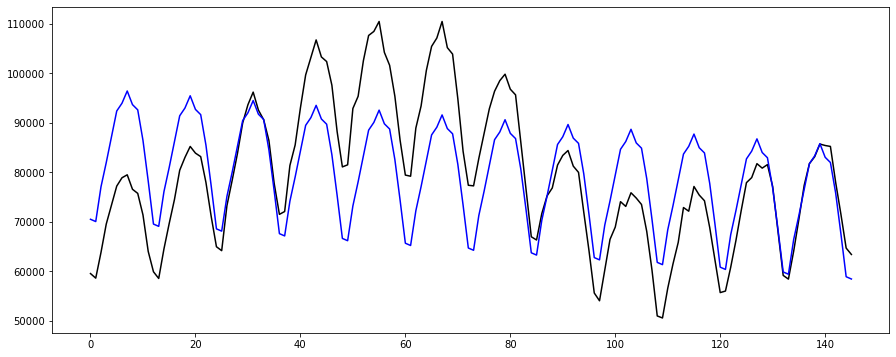

In [150]:
fig,ax = plt.subplots() 
ax.plot(df_cts['Total Construction'],c = 'k')
ax.plot(df_cts['Composite'],c='b')
fig.set_size_inches(15,6)

This method worked to show the seasonality of the data, however it was not sufficient to model the data in a useful, predictive way. Next, I will take the non-linear approach to decomposing this time series

### Non-Linear Approach to Decomposition 

In order to develop a more accurate and useful decomposition of this time series data, I will use the methods and techniques from the course lectures to perform a non-linear decomposition. 

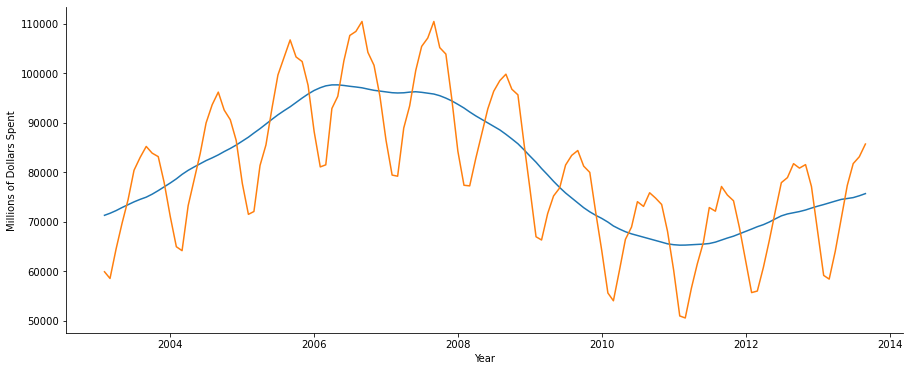

In [151]:
def sqErr(row):
    return (row['Total Construction'] - row['movAvg'])**2
df_cts['movAvg'] = np.NaN
df_cts['sqErr'] = np.NaN
df_cts.index = pd.date_range(freq = 'm', start=pd.Timestamp(year=2002,month=1,day=1), periods = len(df_cts['Total Construction']))

window= 12
window = window - window % 2 
for i in range(int(window/2),df_cts.shape[0]-int(window/2)):
    df_cts.loc[df_cts.index[i],'movAvg'] = (0.5*df_cts.iloc[i-int(window/2)]['Total Construction'] + df_cts.iloc[i-int(window/2)+1:i+int(window/2)]['Total Construction'].sum() + 0.5 * df_cts.iloc[i+int(window/2)]['Total Construction'])/float(window)

    df_cts['sqErr']= (df_cts['Total Construction'] - df_cts['movAvg'])**2

df_cts.dropna(how = 'any', inplace = True)    
#df_cts

fig,ax = plt.subplots()
ax.plot(df_cts['movAvg'], label = 'Moving Average')
ax.plot(df_cts['Total Construction'], label = 'Total Construction')
ax.set_xlabel('Year')
ax.set_ylabel('Millions of Dollars Spent')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.set_size_inches(15,6)


In [152]:
df_cts['R1'] = df_cts['Total Construction'] - df_cts['movAvg']
df_cts['R1Error'] = abs((df_cts['Total Construction'] - df_cts['R1'])/df_cts['Total Construction'])
df_cts.style.format ({
    'movAvg': '{:.1f}'.format,
    'sqErr' : '{:.1f}'.format,
    'R1' : '{:.1f}'.format,
    'R1Error' : '{:.1f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,regress,R1,lag12,S,R2,Composite,errorPerc,movAvg,sqErr,R1Error
2003-01-31 00:00:00,13,Jan-03,59877,45473,14404,84265.735353,-11404.0,59516.000000,-14754.495787,-9634.239566,69511.239566,-16.090051,71281.0,130051216.0,1.2
2003-02-28 00:00:00,14,Feb-03,58526,44620,13906,84185.146040,-13165.0,58588.000000,-15131.906474,-10527.239566,69053.239566,-17.987287,71691.0,173316127.9,1.2
2003-03-31 00:00:00,15,Mar-03,64506,49996,14510,84104.556727,-7727.9,63782.000000,-8033.567162,-11564.989566,76070.989566,-17.928549,72233.9,59720052.0,1.1
2003-04-30 00:00:00,16,Apr-03,69638,53195,16444,84023.967414,-3209.3,69504.000000,-3068.477849,-11317.489566,80955.489566,-16.251888,72847.3,10299553.0,1.0
2003-05-31 00:00:00,17,May-03,74473,56286,18187,83943.378101,1043.4,73384.000000,2196.528131,-11666.906233,86139.906233,-15.665954,73429.6,1088631.4,1.0
2003-06-30 00:00:00,18,Jun-03,80377,60076,20301,83862.788789,6379.9,77182.000000,7520.617444,-11006.406233,91383.406233,-13.693477,73997.1,40703336.7,0.9
2003-07-31 00:00:00,19,Jul-03,82971,62216,20755,83782.199476,8468.8,78863.000000,9167.290090,-9978.489566,92949.489566,-12.026479,74502.2,71720432.3,0.9
2003-08-31 00:00:00,20,Aug-03,85191,63234,21957,83701.610163,10244.2,79460.000000,11722.379403,-10232.989566,95423.989566,-12.011820,74946.8,104944658.1,0.9
2003-09-30 00:00:00,21,Sep-03,83841,61767,22075,83621.020850,8296.6,76542.000000,9049.968716,-8829.989566,92670.989566,-10.531828,75544.4,68833295.0,0.9
2003-10-31 00:00:00,22,Oct-03,83133,62813,20321,83540.431537,6861.6,75710.000000,8074.641362,-8482.072899,91615.072899,-10.203016,76271.4,47081325.8,0.9


Average Residual:  -74.45019531249977


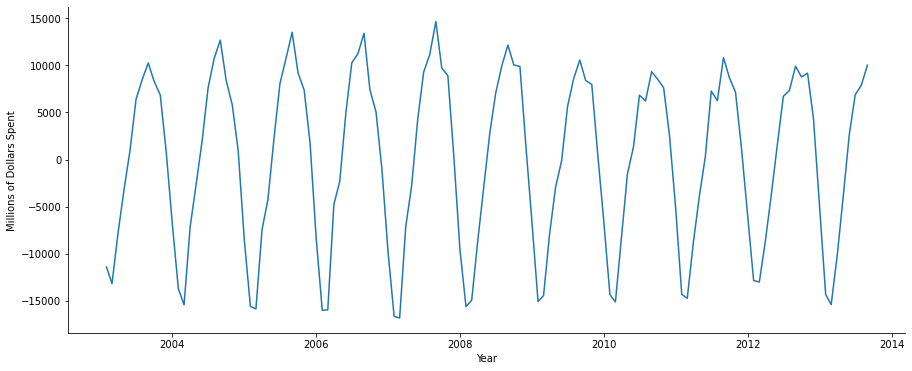

In [153]:
# Plot the R1 col 

fig,ax = plt.subplots()
ax.plot(df_cts['R1'])
ax.set_xlabel('Year')
ax.set_ylabel('Millions of Dollars Spent')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(df_cts['R1'])/len(df_cts))
fig.set_size_inches(15,6)

In [154]:
# Cyclicality: Autocorrelation

maxCorr = 0.0
period = np.NaN
for i in range(1,25):
    corr = df_cts['R1'].autocorr(lag=i)
    print('Correlation, lag: ',i,'  ', corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i 
print('Period = ',period,'   Maximum Correlation = ',maxCorr)

Correlation, lag:  1    0.8338855080367756
Correlation, lag:  2    0.44967488545484974
Correlation, lag:  3    -0.0402588101672279
Correlation, lag:  4    -0.48923255595521903
Correlation, lag:  5    -0.7961464197921463
Correlation, lag:  6    -0.9110265569205774
Correlation, lag:  7    -0.7946628242268255
Correlation, lag:  8    -0.48187991410847303
Correlation, lag:  9    -0.03446602757815777
Correlation, lag:  10    0.44474721040113224
Correlation, lag:  11    0.8226885906465677
Correlation, lag:  12    0.9880851540192827
Correlation, lag:  13    0.833653020129439
Correlation, lag:  14    0.4617412628746924
Correlation, lag:  15    -0.02630249850144192
Correlation, lag:  16    -0.4757024605493346
Correlation, lag:  17    -0.7872885482426655
Correlation, lag:  18    -0.90897676947471
Correlation, lag:  19    -0.7975222799804916
Correlation, lag:  20    -0.4908319230022553
Correlation, lag:  21    -0.049116822912203324
Correlation, lag:  22    0.4317070723915257
Correlation, lag:  23 

This is a strong indicator that the cycle in annual. 

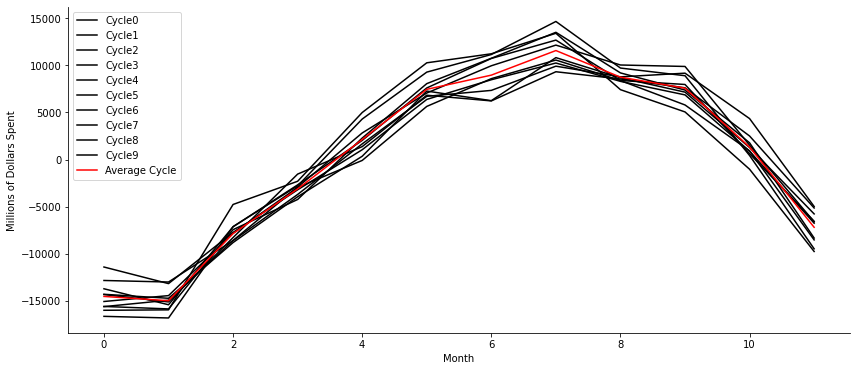

In [155]:
period = 12 
cycleLen = period 
numCycles = int(len(df_cts)/cycleLen)
cycles = [df_cts.iloc[range(i*period,min((i+1)*period,len(df_cts)))]['R1'] for i in range(numCycles)]
pointsInCycles = [df_cts.iloc[range(i,len(df_cts['R1']), period)]['R1'].tolist() for i in range(period)]
avg = [sum(points)/len(points) for points in pointsInCycles]

fig, ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle'+str(i), c = 'k')
ax.plot(avg, label = 'Average Cycle', c = 'r')
ax.set_xlabel('Month')
ax.set_ylabel('Millions of Dollars Spent')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.set_size_inches(14,6)
ax.legend() 

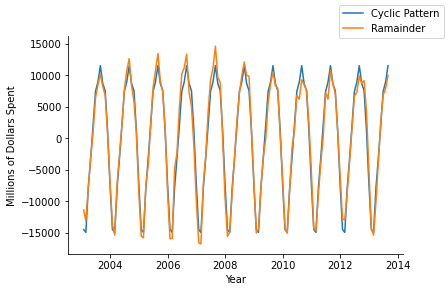

In [156]:
# Create a Cyclicality Column 
cycleLen = period 
numCycles = int(len(df_cts)/cycleLen)
df_cts['C'] = np.NaN
for i in range(len(df_cts)):
    df_cts.loc[df_cts.index[i], 'C'] = avg[i % cycleLen]
    
fig, ax = plt.subplots()
ax.plot(df_cts['C'], label = 'Cyclic Pattern')
ax.plot(df_cts['R1'], label = 'Ramainder')
ax.set_xlabel('Year')
ax.set_ylabel('Millions of Dollars Spent')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.legend() 
#fig.set_size_inches(15,6)

Average Error:  0.013497383085471102
            Month Month-Year  Total Construction  Private Construction  \
2003-01-31     13     Jan-03               59877                 45473   
2003-02-28     14     Feb-03               58526                 44620   
2003-03-31     15     Mar-03               64506                 49996   
2003-04-30     16     Apr-03               69638                 53195   
2003-05-31     17     May-03               74473                 56286   
...           ...        ...                 ...                   ...   
2013-04-30    136     Apr-13               70535                 50022   
2013-05-31    137     May-13               77327                 54369   
2013-06-30    138     Jun-13               81722                 56228   
2013-07-31    139     Jul-13               83104                 56354   
2013-08-31    140     Aug-13               85677                 57481   

            Public Construction       regress            R1    lag12  \
20

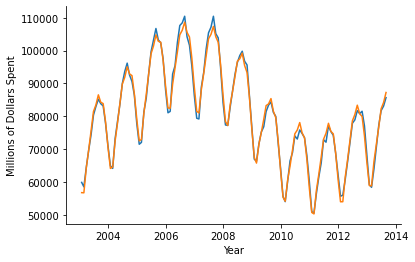

In [157]:
df_cts['R2']= df_cts['R1']-df_cts['C']
df_cts['R2Error']= abs(df_cts['R2']/df_cts['Total Construction'])
df_cts['fit']= df_cts['movAvg'] + df_cts['C']
df_cts.drop(['sqErr'],axis =1, inplace = True)
print('Average Error: ', sum(df_cts['R2Error'])/len(df_cts))
print(df_cts)
fic, ax = plt.subplots()
ax.plot(df_cts['Total Construction'],label = 'Total Construction')
ax.plot(df_cts['fit'],label='Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Millions of Dollars Spent')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
